<a href="https://colab.research.google.com/github/paulosrl/AnaliseGrafos/blob/main/pivys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import uuid

In [ ]:
%pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00


In [ ]:
%pip install ipysigma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.7 MB/s eta 0:00:00


In [ ]:
import pyvis
import ipysigma
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import copy

In [ ]:
def get_new_test_graph():
    # hard code parameters and use seed to replicate same network each time
    NUM_NODES = 50
    p = 0.5
    seed = 1
    test_graph = nx.dual_barabasi_albert_graph(n=NUM_NODES, p=p, seed=1, m1=2, m2=1)

    ### append node properties

    # 1. Compute Node Degree
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    # 2. Compute betweenness centrality
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
        # 3. Simulate node level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

        # 4. Simulate UIDs as node identifiers
        data['node_identifier'] = str(uuid.uuid4())

    ### append edge properties
    for u, v, data in test_graph.edges(data=True):

        # Simulate edge level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)

    return test_graph


In [ ]:
test_graph=get_new_test_graph()

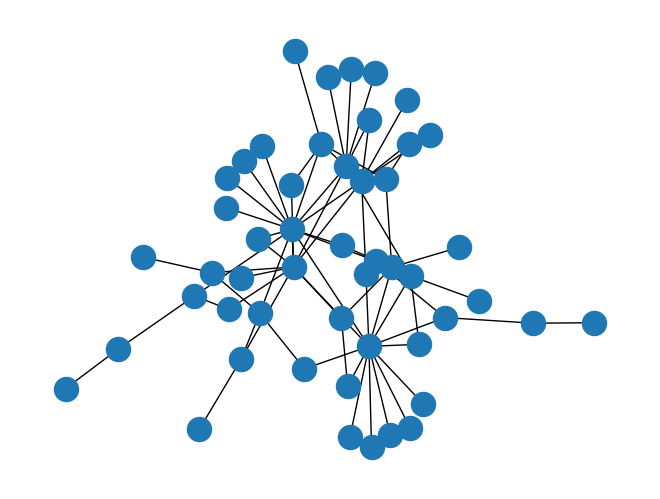

In [ ]:
nx.draw(test_graph)

In [ ]:
sigma = ipysigma.Sigma(test_graph)

In [ ]:
G = nx.karate_club_graph() # Cria um grafo networkx
sigma = ipysigma.Sigma(G) # Passa o grafo para o Sigma

In [ ]:
for node, data in test_graph.nodes(data=True):

    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}" +
        f"\nfeature 3: {data['feature3']}" +
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" +
        f"\nDegree: {data['degree']}"
    )


for u, v, data in test_graph.edges(data=True):

    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}"
    )

In [ ]:
# set node size to be scaled according to betweenness centrality
for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality']

# set edge size to be scaled according to feature1.
for u, v, data in test_graph.edges(data=True):
    data['value'] = data['feature1']

In [ ]:
class MplColorHelper:
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgba(self, val):
    return self.scalarMap.to_rgba(val, bytes=True)

  def get_rgb_str(self, val):
    r, g, b, a = self.get_rgba(val)
    return f"rgb({r},{g},{b})"

In [ ]:
def Sigma(graph=test_graph,
          # node config
          node_color='betweenness_centrality',
          node_color_gradient="Reds",
          node_size='betweenness_centrality',
          node_label='node_identifier',
          #edge config
          edge_color="feature1",
          edge_color_gradient="Reds",
          edge_size="feature1",
          # general config
          background_color="grey"):
  return

In [ ]:
Sigma


<function __main__.Sigma(graph=<networkx.classes.graph.Graph object at 0x7b0fef601de0>, node_color='betweenness_centrality', node_color_gradient='Reds', node_size='betweenness_centrality', node_label='node_identifier', edge_color='feature1', edge_color_gradient='Reds', edge_size='feature1', background_color='grey')>

In [ ]:
# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
node_colors = MplColorHelper("Reds", betweenness_min, betweenness_max)

# prep edge color generator
vals = nx.get_edge_attributes(test_graph, 'feature1').values()
val_min, val_max = min(vals), max(vals)
#edge_colors = MplColorHelper("Reds", val_min, val_max)

In [ ]:
for node, data in test_graph.nodes(data=True):
  data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])

for u, v, data in test_graph.edges(data=True):
  data['color'] = edge_colors.get_rgb_str(data['feature1'])

NameError: ignored